In [2]:
import pandas as pd
import numpy as np
#import plotly.express as px
import matplotlib.pyplot as plt
 #ml library
from sklearn.linear_model import LinearRegression

In [3]:
df=pd.read_csv('Summary of Weather.csv')

C:\Users\oo_wa\AppData\Local\Temp\ipykernel_1992\2332669627.py:1: DtypeWarning: Columns (7,8,18,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('Summary of Weather.csv')


In [4]:
df.head()

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0.0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

<Axes: xlabel='MinTemp'>

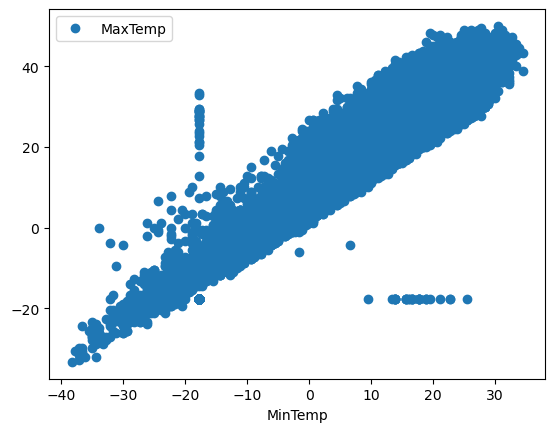

In [6]:
#relation between mintemp and maxtemp
df.plot(x='MinTemp',y='MaxTemp',style='o')

In [7]:
#assign data
x=df['MinTemp'].values.reshape(-1,1)
y=df['MaxTemp'].values.reshape(-1,1)

In [8]:
# split data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20)

In [9]:
# create model
model = LinearRegression()
model.fit(x_train, y_train)
y_predict=model.predict(x_test)

In [10]:
model.coef_

array([[0.91925578]])

In [11]:
model.intercept_

array([10.69149801])

In [12]:
df2=pd.DataFrame({'actual':y_test.flatten(),'prediction':y_predict.flatten()})
df2

,actual,prediction
0,13.333333,16.819870
1,31.111111,34.183590
2,32.222222,32.651497
3,32.222222,31.630102
4,33.333333,29.076614
...,...,...
23803,30.555556,27.544521
23804,8.333333,10.180800
23805,24.444444,28.055218
23806,30.000000,30.098009


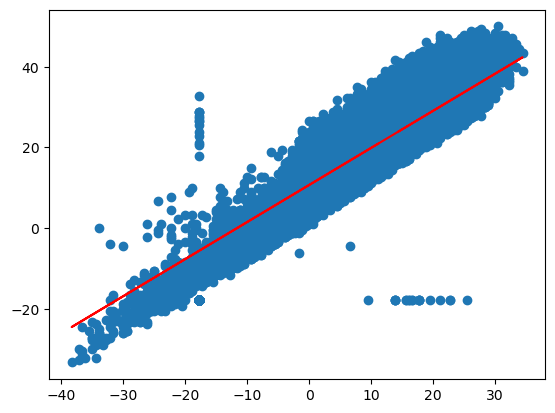

In [13]:
plt.scatter(x_train,y_train)
plt.plot(x_train,model.predict(x_train),color='red')

<Axes: >

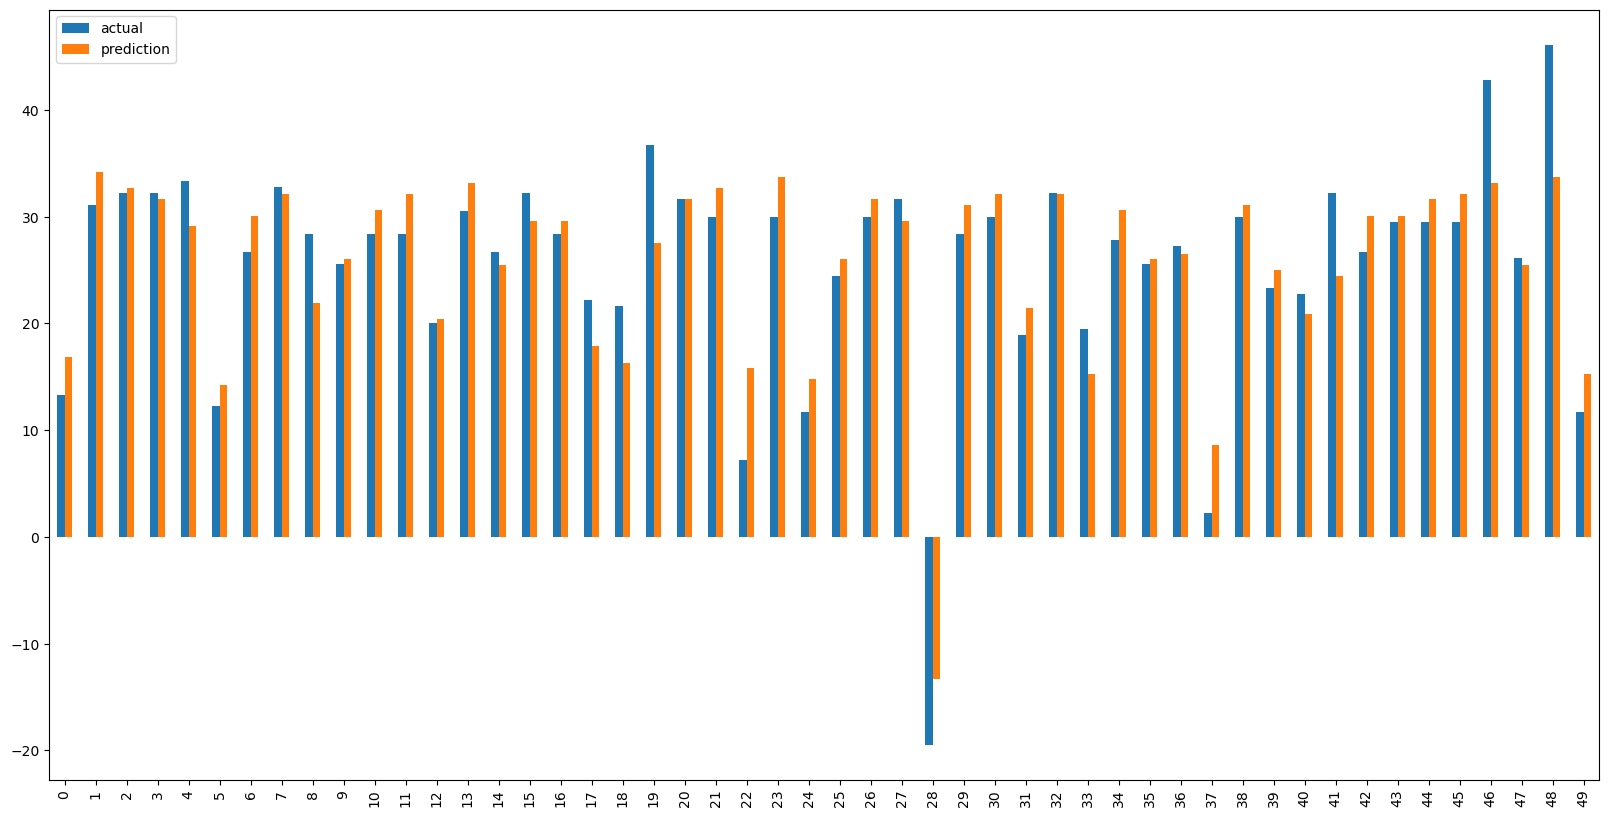

In [14]:
df2.head(50).plot(kind='bar',figsize=(20,10))